In [56]:
# импорт библиотек
import pandas as pd
#import matplotlib
from matplotlib import pyplot as plt
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

In [57]:
import numpy as np

In [ ]:
df_staff = pd.read_excel('data.xlsx')

In [ ]:
df_staff['dismiss_year']=df_staff['dismiss_year'].fillna(0)
df_staff['dismiss_month'] =df_staff['dismiss_month'].fillna(0)
df_staff['dismiss_year'] = df_staff['dismiss_year'].astype(int)
df_staff['dismiss_month'] = df_staff['dismiss_month'].astype(int)

In [60]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30065 non-null  int64         
 1   fullname       30065 non-null  object        
 2   hire_date      30065 non-null  datetime64[ns]
 3   current_state  21871 non-null  object        
 4   is_dismiss     30065 non-null  int64         
 5   dismiss_date   19682 non-null  datetime64[ns]
 6   short_pos      30065 non-null  object        
 7   hire_year      30065 non-null  int64         
 8   dismiss_year   30065 non-null  int32         
 9   dismiss_month  30065 non-null  int32         
 10  cnt_2021       11999 non-null  float64       
 11  cnt_2022       11383 non-null  float64       
 12  cnt_2023       10383 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(2), int64(3), object(3)
memory usage: 2.8+ MB


In [61]:
df_group_ym =df_staff.groupby(['dismiss_year', 'dismiss_month']).agg({
    'dismiss_date':'count'
}).reset_index()

In [62]:
df_group_ym = df_group_ym[df_group_ym['dismiss_year']>=2022]

In [63]:
df_group_ym

,dismiss_year,dismiss_month,dismiss_date
18,2022,1,570
19,2022,2,839
20,2022,3,1076
21,2022,4,1340
22,2022,5,1176
23,2022,6,1174
24,2022,7,1186
25,2022,8,1180
26,2022,9,1306
27,2022,10,1087


In [64]:
df_group_ym ['perc_turnover']= np.where (df_group_ym ['dismiss_year'] == 2022,\
          df_group_ym ['dismiss_date']/11383*100,\
          df_group_ym ['dismiss_date']/10370*100)
df_group_ym.head()

,dismiss_year,dismiss_month,dismiss_date,perc_turnover
18,2022,1,570,5.007467
19,2022,2,839,7.370640
20,2022,3,1076,9.452693
21,2022,4,1340,11.771941
22,2022,5,1176,10.331196


In [65]:
df_group_ym['dismiss_year'] = df_group_ym['dismiss_year'].astype(str)
df_group_ym['dismiss_month'] = df_group_ym['dismiss_month'].astype(str)
df_group_ym['date_id'] = df_group_ym['dismiss_year'] + '-' + df_group_ym['dismiss_month']
df_group_ym['dismiss_year'] = df_group_ym['dismiss_year'].astype(int)
df_group_ym['dismiss_month'] = df_group_ym['dismiss_month'].astype(int)

In [66]:
df_group_ym_2022_6 = df_group_ym[(df_group_ym['dismiss_year']==2022)&(df_group_ym['dismiss_month']<=6)]
df_group_ym_2023 = df_group_ym[df_group_ym['dismiss_year']==2023]

## Общий отток

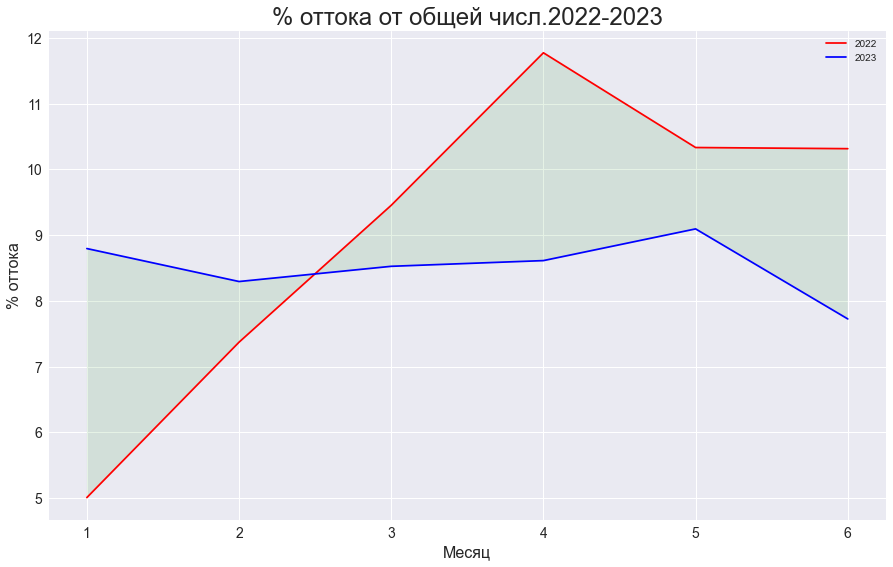

In [166]:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_group_ym_2022_6['dismiss_month'],
        df_group_ym_2022_6['perc_turnover'],
        c='red', label = '2022')
plt.plot(df_group_ym_2023['dismiss_month'],
         df_group_ym_2023['perc_turnover'],
         c='blue', label = '2023')
plt.fill_between(df_group_ym_2022_6['dismiss_month'],
                 df_group_ym_2022_6['perc_turnover'],
                 df_group_ym_2023['perc_turnover'],
                facecolor = 'green', alpha = 0.1)
# Подписи графика:
plt.title('% оттока от общей числ.2022-2023', fontsize = 24)
plt.xlabel('Месяц', fontsize = 16)
plt.ylabel('% оттока', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
plt.savefig('graphs/% оттока от общей числ.2022-2023.png', bbox_inches = 'tight')
plt.show()

In [68]:
df_group_ymp =df_staff.groupby(['dismiss_year', 'dismiss_month', 'short_pos']).agg({
    'dismiss_date':'count'
}).reset_index()
df_group_ymp ['perc_turnover']= np.where (df_group_ymp ['dismiss_year'] == 2022,\
          df_group_ymp ['dismiss_date']/11383*100,\
          df_group_ymp ['dismiss_date']/10370*100)

df_group_ymp['dismiss_year'] = df_group_ymp['dismiss_year'].astype(str)
df_group_ymp['dismiss_month'] = df_group_ymp['dismiss_month'].astype(str)
df_group_ymp['date_id'] = df_group_ymp['dismiss_year'] + '-' + df_group_ymp['dismiss_month']
df_group_ymp['dismiss_year'] = df_group_ymp['dismiss_year'].astype(int)
df_group_ymp['dismiss_month'] = df_group_ymp['dismiss_month'].astype(int)
df_group_ymp = df_group_ymp[df_group_ymp['dismiss_year']>2021]


df_group_ymp.head()

,dismiss_year,dismiss_month,short_pos,dismiss_date,perc_turnover,date_id
27,2022,1,НОП,67,0.588597,2022-1
28,2022,1,спец,503,4.418870,2022-1
29,2022,2,НОП,115,1.010278,2022-2
30,2022,2,спец,724,6.360362,2022-2
31,2022,3,НОП,121,1.062989,2022-3


In [69]:
df_group_ymp_2022_6_nop = df_group_ymp[(df_group_ymp['dismiss_year'] == 2022)
                                       & (df_group_ymp['dismiss_month'] <= 6) &
                                       (df_group_ymp['short_pos'] == 'НОП')]
df_group_ymp_2023_nop = df_group_ymp[(df_group_ymp['dismiss_year'] == 2023)&(df_group_ymp['short_pos'] == 'НОП')]

## Отток НОП

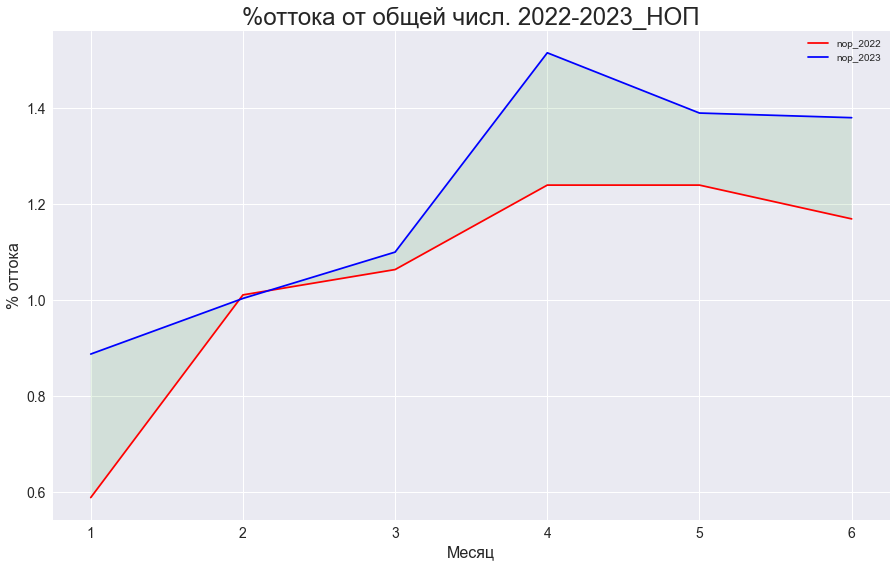

In [167]:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_group_ymp_2022_6_nop['dismiss_month'],
        df_group_ymp_2022_6_nop['perc_turnover'],
        c='red', label = 'nop_2022')
plt.plot(df_group_ymp_2023_nop['dismiss_month'],
         df_group_ymp_2023_nop['perc_turnover'],
         c='blue', label = 'nop_2023')
plt.fill_between(df_group_ymp_2022_6_nop['dismiss_month'],
                 df_group_ymp_2022_6_nop['perc_turnover'],
                 df_group_ymp_2023_nop['perc_turnover'],
                facecolor = 'green', alpha = 0.1)
# Подписи графика:
plt.title('%оттока от общей числ. 2022-2023_НОП', fontsize = 24)
plt.xlabel('Месяц', fontsize = 16)
plt.ylabel('% оттока', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
plt.savefig('graphs/%оттока от общей числ. 2022-2023_НОП.png', bbox_inches = 'tight')
plt.show()

In [71]:
df_group_ymp_2022_6_s = df_group_ymp[(df_group_ymp['dismiss_year'] == 2022)
                                       & (df_group_ymp['dismiss_month'] <= 6) &
                                       (df_group_ymp['short_pos'] == 'спец')]
df_group_ymp_2023_s = df_group_ymp[(df_group_ymp['dismiss_year'] == 2023)&(df_group_ymp['short_pos'] == 'спец')]

## отток спец

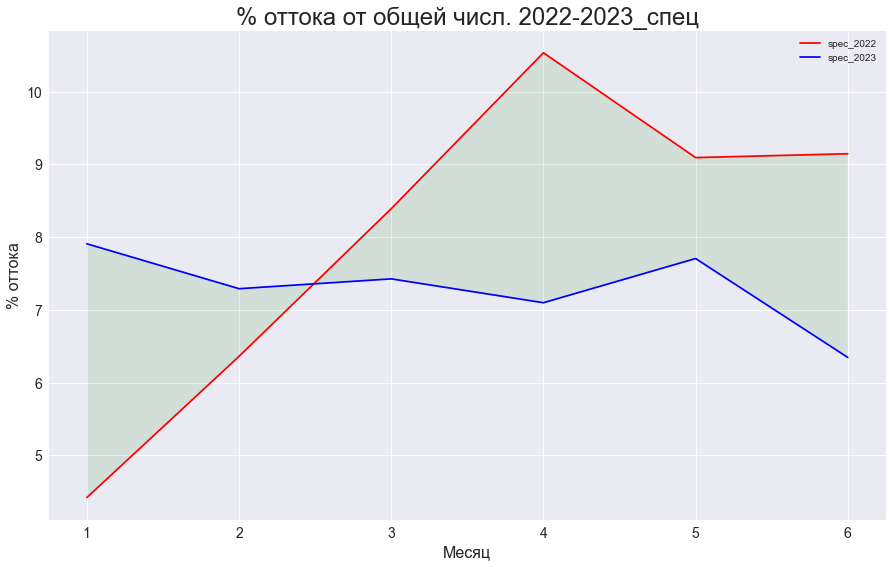

In [169]:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_group_ymp_2022_6_s['dismiss_month'],
        df_group_ymp_2022_6_s['perc_turnover'],
        c='red', label = 'spec_2022')
plt.plot(df_group_ymp_2023_s['dismiss_month'],
         df_group_ymp_2023_s['perc_turnover'],
         c='blue', label = 'spec_2023')
plt.fill_between(df_group_ymp_2022_6_s['dismiss_month'],
                 df_group_ymp_2022_6_s['perc_turnover'],
                 df_group_ymp_2023_s['perc_turnover'],
                facecolor = 'green', alpha = 0.1)
# Подписи графика:
plt.title('% оттока от общей числ. 2022-2023_спец', fontsize = 24)
plt.xlabel('Месяц', fontsize = 16)
plt.ylabel('% оттока', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
plt.savefig('graphs/% оттока от общей числ. 2022-2023_спец.png', bbox_inches = 'tight')
plt.show()

In [ ]:
greids = pd.read_excel('greids.xlsx', skiprows = 1)
greids.columns = ['fullname', 'tab_number', 'greids']

In [74]:
greids['tab_number'] = greids['tab_number'].astype(str)

In [75]:
greids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fullname    5029 non-null   object
 1   tab_number  5029 non-null   object
 2   greids      4504 non-null   object
dtypes: object(3)
memory usage: 118.0+ KB


In [76]:
tabs = []
greids['tab_number_2'] = pd.Series()
for tab in greids['tab_number']:
    tab_2 = tab[:6] 
    tabs.append(tab_2)
greids['tab_number_2'] = tabs

In [78]:
greids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fullname      5029 non-null   object
 1   tab_number    5029 non-null   object
 2   greids        4504 non-null   object
 3   tab_number_2  5029 non-null   object
dtypes: object(4)
memory usage: 157.3+ KB


In [ ]:
df_staff_t = pd.read_excel('data_with_tab.xlsx')
df_staff_t['barcode_mts']=df_staff_t['barcode_mts'].astype(str)
tabs_staff = []
df_staff_t['tab_number_2'] = pd.Series()
for tab in df_staff_t['barcode_mts']:
    tab_2 = tab[:6] 
    tabs_staff.append(tab_2)
df_staff_t['tab_number_2'] = tabs_staff

In [ ]:
df_staff_t['dismiss_year']=df_staff_t['dismiss_year'].fillna(0)
df_staff_t['dismiss_month'] =df_staff_t['dismiss_month'].fillna(0)
df_staff_t['dismiss_year'] = df_staff_t['dismiss_year'].astype(int)
df_staff_t['dismiss_month'] = df_staff_t['dismiss_month'].astype(int)

In [ ]:
df_staff_t = df_staff_t.merge(greids, how='left', on='tab_number_2')
df_staff_t_2 = df_staff_t[[
    'fullname_x',
    'hire_date',
    'current_state',
    'is_dismiss',
    'dismiss_date',
    'short_pos',
    'hire_year',
    'dismiss_year',
    'dismiss_month',
    'tab_number_2',
    'greids'
]]

In [83]:
df_staff_t_2['greids'] = df_staff_t_2['greids'].fillna('free')

C:\Users\nvlysen2\AppData\Local\Temp\ipykernel_17152\2708623721.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_staff_t_3 = df_staff_t_2[df_staff_t_2['greids']!= 'free']

In [87]:
df_staff_t_3_gr = df_staff_t_3.groupby(['greids']).agg({'tab_number_2':'count'}).reset_index()

In [88]:
df_staff_t_3_gr.head()

,greids,tab_number_2
0,A,604
1,B,896
2,C,2190
3,D,807


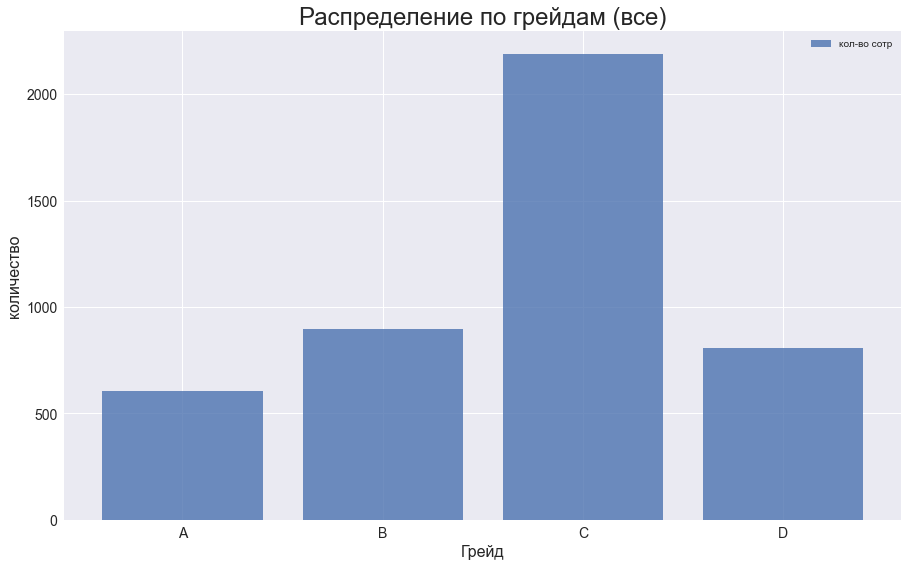

In [89]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_t_3_gr['greids'],
        df_staff_t_3_gr['tab_number_2'], alpha = 0.8, label = 'кол-во сотр')
# Подписи графика:
plt.title('Распределение по грейдам (все)', fontsize = 24)
plt.xlabel('Грейд', fontsize = 16)
plt.ylabel('количество', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
plt.savefig('graphs/Распределение по грейдам (все).png', bbox_inches = 'tight')
plt.show()

In [90]:
df_staff_t_3_nop = df_staff_t_3[df_staff_t_3['short_pos']=='НОП']
df_staff_t_3_s = df_staff_t_3[df_staff_t_3['short_pos']=='спец']

In [91]:
df_staff_t_3_gr_p = df_staff_t_3.groupby(['greids', 'short_pos']).agg({
    'tab_number_2':
    'count'
}).reset_index()

In [92]:
df_staff_t_3_gr_p

,greids,short_pos,tab_number_2
0,A,НОП,256
1,A,спец,348
2,B,НОП,449
3,B,спец,447
4,C,НОП,1167
5,C,спец,1023
6,D,НОП,471
7,D,спец,336


In [93]:
df_staff_t_3_gr_p_nop = df_staff_t_3_gr_p[df_staff_t_3_gr_p['short_pos']=='НОП']
df_staff_t_3_gr_p_sp = df_staff_t_3_gr_p[df_staff_t_3_gr_p['short_pos']=='спец']

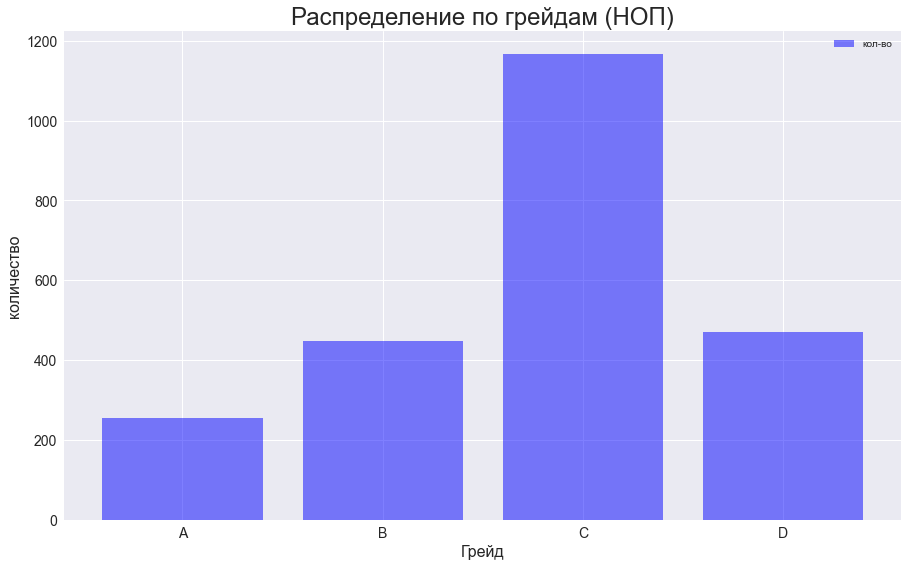

In [171]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_t_3_gr_p_nop['greids'],
       df_staff_t_3_gr_p_nop['tab_number_2'],
       color='blue', alpha = 0.5, label = 'кол-во')

# Подписи графика:
plt.title('Распределение по грейдам (НОП)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
plt.ylabel('количество', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.savefig('graphs/Распределение по грейдам (НОП)', bbox_inches = 'tight')
plt.show()

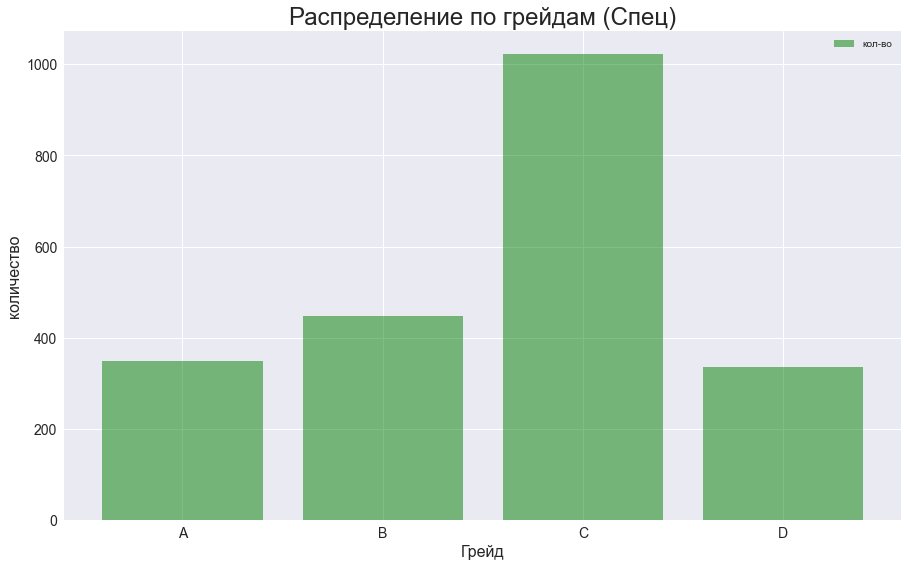

In [170]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_t_3_gr_p_sp['greids'],
       df_staff_t_3_gr_p_sp['tab_number_2'],
       color='green', alpha = 0.5, label = 'кол-во')

# Подписи графика:
plt.title('Распределение по грейдам (Спец)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
plt.ylabel('количество', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.savefig('graphs/Распределение по грейдам (Спец)', bbox_inches = 'tight')
plt.show()

In [96]:
df_staff_gr_turn = df_staff_t_3.groupby(['greids']).agg({
    'tab_number_2':'count',
    'dismiss_date':'count'
}).reset_index()

In [97]:
df_staff_gr_turn

,greids,tab_number_2,dismiss_date
0,A,604,1
1,B,896,3
2,C,2190,14
3,D,807,9


In [98]:
df_staff_gr_turn['perc_turn'] = df_staff_gr_turn[
    'dismiss_date'] / df_staff_gr_turn['tab_number_2'] * 100

In [99]:
df_staff_gr_turn

,greids,tab_number_2,dismiss_date,perc_turn
0,A,604,1,0.165563
1,B,896,3,0.334821
2,C,2190,14,0.639269
3,D,807,9,1.115242


In [100]:
df_staff_gr_turn['perc_turn'] = df_staff_gr_turn[
    'dismiss_date'] / df_staff_gr_turn['tab_number_2'] * 100

In [101]:
df_staff_gr_turn

,greids,tab_number_2,dismiss_date,perc_turn
0,A,604,1,0.165563
1,B,896,3,0.334821
2,C,2190,14,0.639269
3,D,807,9,1.115242


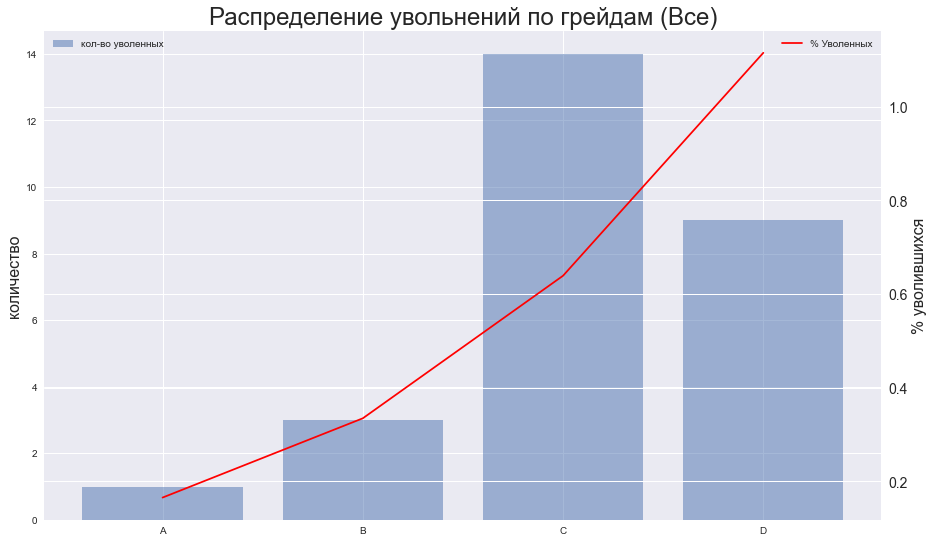

In [172]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_gr_turn['greids'],
       df_staff_gr_turn['dismiss_date'], alpha = 0.5, label ='кол-во уволенных')
ax2=ax.twinx()
ax2.plot(df_staff_gr_turn['greids'],
       df_staff_gr_turn['perc_turn'],
       color='red', label = '% Уволенных')

# Подписи графика:
plt.title('Распределение увольнений по грейдам (Все)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество', fontsize=16)
ax2.set_ylabel('% уволившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.savefig('graphs/Распределение увольнений по грейдам (Все)', bbox_inches = 'tight')
plt.show()

In [103]:
df_staff_gr_turn

,greids,tab_number_2,dismiss_date,perc_turn
0,A,604,1,0.165563
1,B,896,3,0.334821
2,C,2190,14,0.639269
3,D,807,9,1.115242


In [104]:
df_staff_t_3_gr_p_nop = df_staff_t_3_gr_p[df_staff_t_3_gr_p['short_pos']=='НОП']
df_staff_t_3_gr_p_sp = df_staff_t_3_gr_p[df_staff_t_3_gr_p['short_pos']=='спец']

In [107]:
df_staff_t_3_gr_p_sp

,greids,short_pos,tab_number_2
1,A,спец,348
3,B,спец,447
5,C,спец,1023
7,D,спец,336


In [108]:
df_staff_t_2 = df_staff_t_2[(df_staff_t_2['dismiss_year']==2023)|(df_staff_t_2['dismiss_year']==0)]
df_staff_t_2_gr = df_staff_t_2.groupby(['greids']).agg({'tab_number_2':'count', 'dismiss_date':'count'}).reset_index()

In [174]:
df_staff_t_2.to_excel('увольнения_грейд.xlsx')

In [109]:
df_staff_t_2_gr['%dismiss'] = df_staff_t_2_gr['dismiss_date']/df_staff_t_2_gr['tab_number_2']*100
df_staff_t_2_gr

,greids,tab_number_2,dismiss_date,%dismiss
0,A,604,1,0.165563
1,B,896,3,0.334821
2,C,2190,14,0.639269
3,D,807,9,1.115242
4,free,11179,5266,47.106181


In [110]:
df_staff_t_2_gr_test = df_staff_t_2.groupby(['dismiss_year']).agg({
    'tab_number_2': 'count',
    'dismiss_date': 'count'
}).reset_index()

In [111]:
df_staff_t_2_gr_test

,dismiss_year,tab_number_2,dismiss_date
0,0,10383,0
1,2023,5293,5293


In [112]:
df_staff_t_2_gr__pos = df_staff_t_2.groupby(['short_pos', 'greids']).agg({
    'tab_number_2':
    'count',
    'dismiss_date':
    'count'
}).reset_index()
df_staff_t_2_gr__pos['%dismiss'] = df_staff_t_2_gr__pos[
    'dismiss_date'] / df_staff_t_2_gr__pos['tab_number_2'] * 100
df_staff_t_2_gr__pos

,short_pos,greids,tab_number_2,dismiss_date,%dismiss
0,НОП,A,256,1,0.390625
1,НОП,B,449,1,0.222717
2,НОП,C,1167,1,0.085690
3,НОП,D,471,6,1.273885
4,НОП,free,1831,745,40.688149
5,спец,A,348,0,0.000000
6,спец,B,447,2,0.447427
7,спец,C,1023,13,1.270772
8,спец,D,336,3,0.892857
9,спец,free,9348,4521,48.363286


In [116]:
df_staff_gr_p_turn_nop = df_staff_t_2_gr__pos[
    (df_staff_t_2_gr__pos['short_pos'] == 'НОП')
    & (df_staff_t_2_gr__pos['greids'] != 'free')]

df_staff_gr_p_turn_sp = df_staff_t_2_gr__pos[
    (df_staff_t_2_gr__pos['short_pos'] == 'спец')
    & (df_staff_t_2_gr__pos['greids'] != 'free')]

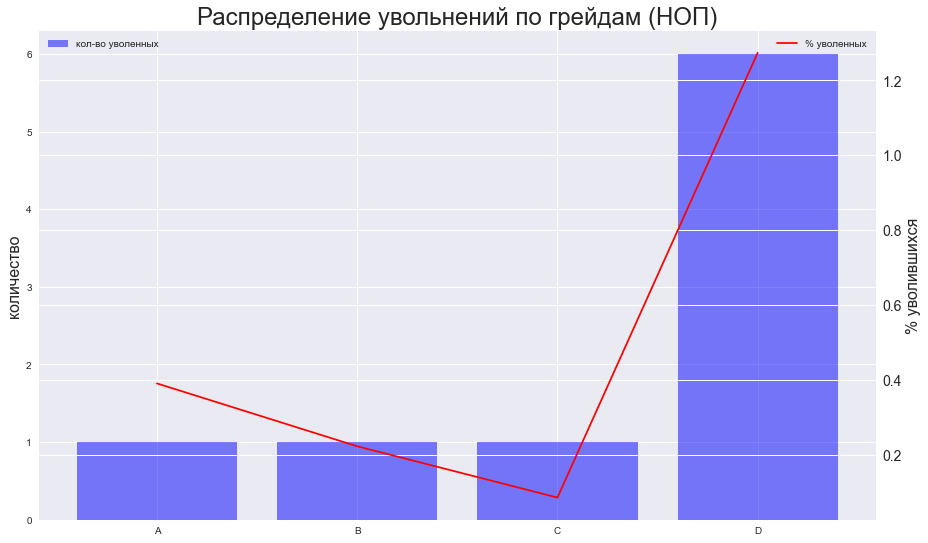

In [118]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_gr_p_turn_nop['greids'],
       df_staff_gr_p_turn_nop['dismiss_date'],
       color='blue', alpha = 0.5, label = 'кол-во уволенных')
ax2=ax.twinx()
ax2.plot(df_staff_gr_p_turn_nop['greids'],
       df_staff_gr_p_turn_nop['%dismiss'],
       color='red', label ='% уволенных')

# Подписи графика:
plt.title('Распределение увольнений по грейдам (НОП)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество', fontsize=16)
ax2.set_ylabel('% уволившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.savefig('graphs/Распределение увольнений по грейдам (НОП)', bbox_inches = 'tight')
plt.show()

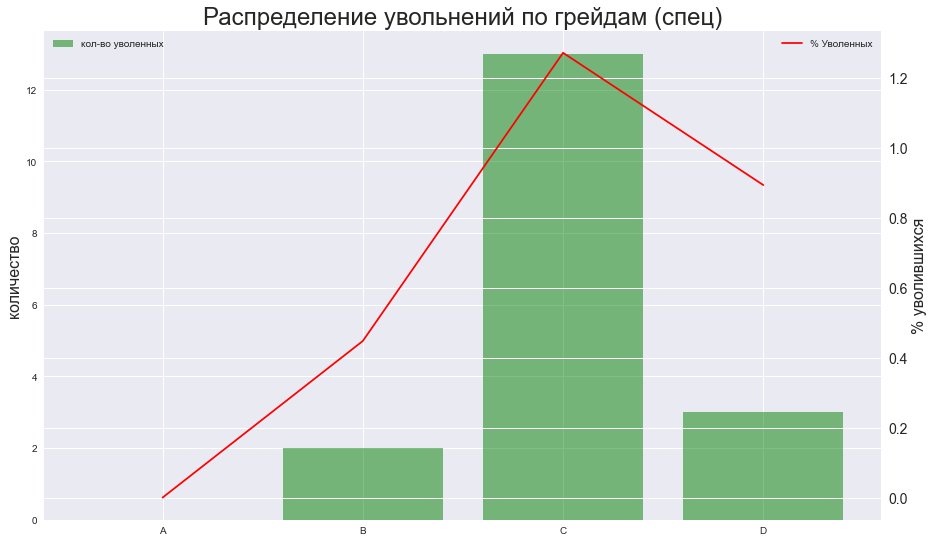

In [119]:
#Рапределение по грейдам:
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_gr_p_turn_sp['greids'],
       df_staff_gr_p_turn_sp['dismiss_date'],
       color='green', alpha =0.5, label = 'кол-во уволенных')
ax2=ax.twinx()
ax2.plot(df_staff_gr_p_turn_sp['greids'],
       df_staff_gr_p_turn_sp['%dismiss'],
       color='red', label = '% Уволенных')

# Подписи графика:
plt.title('Распределение увольнений по грейдам (спец)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество', fontsize=16)
ax2.set_ylabel('% уволившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


#plt.legend()
plt.savefig('graphs/Распределение увольнений по грейдам (спец).png', bbox_inches = 'tight')
plt.show()

## Амнистированные

In [ ]:
df_amn_n = pd.read_excel('Итоги по Аттестации_final_HRBP_амнистия.xlsx',\
                        sheet_name = 'НОП', skiprows = 2, usecols = ['TAB_NUM_MTS', 'Амнистия'],  )
df_amn_sp = pd.read_excel('Итоги по Аттестации_final_HRBP_амнистия.xlsx',\
                        sheet_name = 'СПЕЦ', skiprows = 2, usecols = ['TAB_NUM_MTS', 'Амнистия'],  )
df_amn = pd.concat([df_amn_n, df_amn_sp])

In [ ]:
df_amn['TAB_NUM_MTS']=df_amn['TAB_NUM_MTS'].astype(str)
tabs_staff = []
df_amn['tab_number_2'] = pd.Series()
for tab in df_amn['TAB_NUM_MTS']:
    tab_2 = tab[:6] 
    tabs_staff.append(tab_2)
df_amn['tab_number_2'] = tabs_staff

In [ ]:
df_amn = df_amn [df_amn['Амнистия']=='амнистия']

In [139]:
df_staff_amn = df_staff_t_3.merge(df_amn, how = 'left', on ='tab_number_2')

In [140]:
df_staff_amn['greids_amn'] = np.where(df_staff_amn['Амнистия']=='амнистия','C',df_staff_amn['greids'])

In [156]:
df_staff_amn_gr = df_staff_amn.groupby(['greids_amn', 'short_pos']).agg({
    'tab_number_2':
    'count',
    'dismiss_date':
    'count'
}).reset_index()

df_staff_amn_gr['%dismiss'] = df_staff_amn_gr[
    'dismiss_date'] / df_staff_amn_gr['tab_number_2'] * 100

df_staff_amn_gr

,greids_amn,short_pos,tab_number_2,dismiss_date,%dismiss
0,A,НОП,256,1,0.390625
1,A,спец,348,0,0.000000
2,B,НОП,449,1,0.222717
3,B,спец,447,2,0.447427
4,C,НОП,1290,1,0.077519
5,C,спец,1189,14,1.177460
6,D,НОП,348,6,1.724138
7,D,спец,170,2,1.176471


In [157]:
df_staff_amn_gr_nop = df_staff_amn_gr[df_staff_amn_gr['short_pos']=='НОП']
df_staff_amn_gr_sp = df_staff_amn_gr[df_staff_amn_gr['short_pos']=='спец']

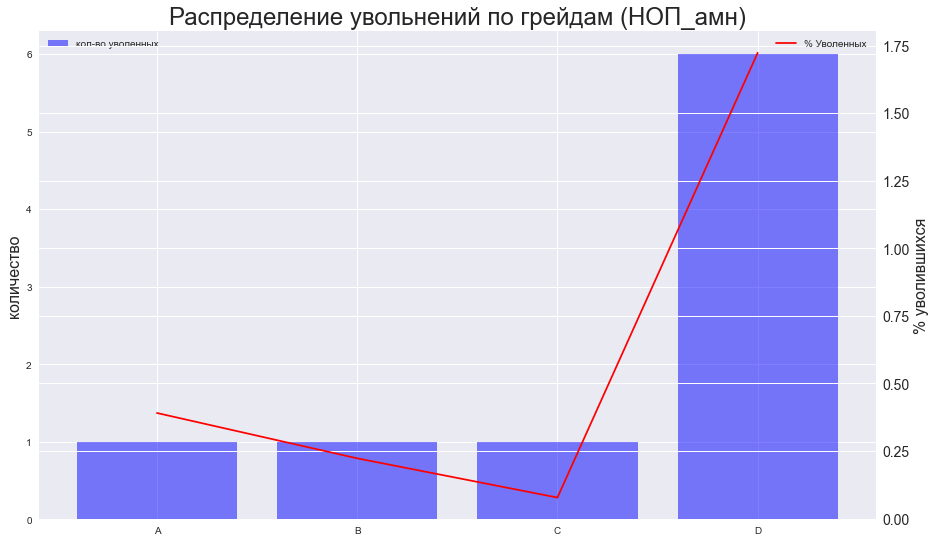

In [162]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_amn_gr_nop['greids_amn'],
       df_staff_amn_gr_nop['dismiss_date'],
       color='blue', alpha =0.5, label = 'кол-во уволенных')
ax2=ax.twinx()
ax2.plot(df_staff_amn_gr_nop['greids_amn'],
       df_staff_amn_gr_nop['%dismiss'],
       color='red', label = '% Уволенных')

# Подписи графика:
plt.title('Распределение увольнений по грейдам (НОП_амн)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество', fontsize=16)
ax2.set_ylabel('% уволившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


#plt.legend()
plt.savefig('graphs/Распределение увольнений по грейдам (НОП_АМН).png', bbox_inches = 'tight')
plt.show()

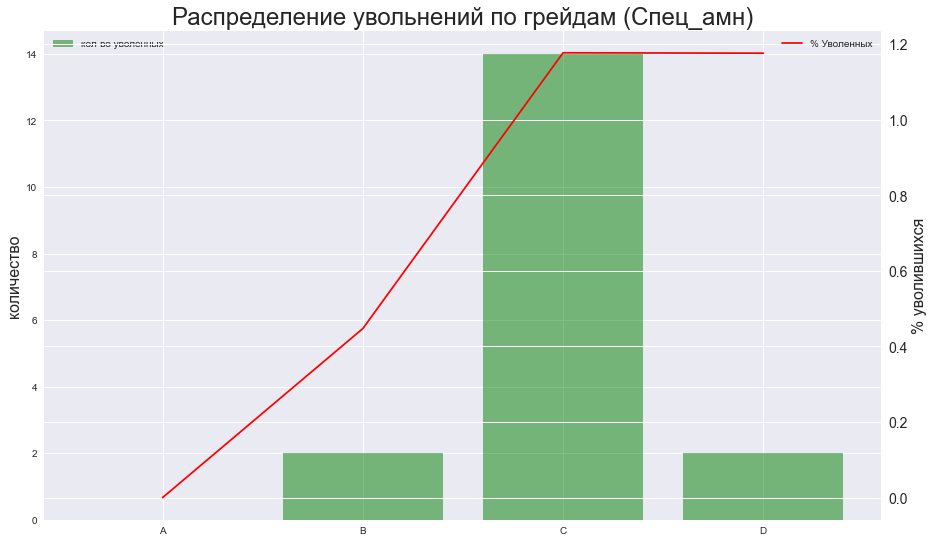

In [163]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_staff_amn_gr_sp['greids_amn'],
       df_staff_amn_gr_sp['dismiss_date'],
       color='green', alpha =0.5, label = 'кол-во уволенных')
ax2=ax.twinx()
ax2.plot(df_staff_amn_gr_sp['greids_amn'],
       df_staff_amn_gr_sp['%dismiss'],
       color='red', label = '% Уволенных')

# Подписи графика:
plt.title('Распределение увольнений по грейдам (Спец_амн)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество', fontsize=16)
ax2.set_ylabel('% уволившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


#plt.legend()
plt.savefig('graphs/Распределение увольнений по грейдам (СПЕЦ_АМН).png', bbox_inches = 'tight')
plt.show()

In [155]:
df_staff_amn.to_excel('anminst.xlsx')

In [165]:
df_staff_t_2_gr__pos.to_excel('таблица_свод_грейд.xlsx', index = False)

In [192]:
df_turndown = pd.read_excel('C:/Users/nvlysen2/Desktop/Лысенко Н. В/dashboard_2023/Назначения/nop.xlsx')

In [ ]:
df_turndown['date_event_down'].fillna(0, inplace = True)
df_turndown = df_turndown[df_turndown['date_event_down']!=0]

In [182]:
import datetime as dt

In [194]:
df_turndown['year_down'] = pd.DatetimeIndex(df_turndown['date_event_down']).year

In [ ]:
df_turndown = df_turndown[df_turndown['year_down']==2023]

In [196]:
df_turndown = df_turndown[['tab_number', 'year_down']]

In [200]:
df_turndown.drop_duplicates(subset = ['tab_number'], inplace = True)
df_turndown['tab_number'] = df_turndown['tab_number'].astype(str)

In [201]:
df_gr_down = df_staff_t_2.merge(df_turndown, how = 'left', left_on = 'tab_number_2',
                               right_on = 'tab_number')

In [208]:
df_gr_down = df_gr_down[(df_gr_down['short_pos']=='НОП')&(df_gr_down['greids']!='free')]
df_gr_down.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 10290
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fullname_x     2343 non-null   object        
 1   hire_date      2343 non-null   datetime64[ns]
 2   current_state  59 non-null     object        
 3   is_dismiss     2343 non-null   int64         
 4   dismiss_date   9 non-null      datetime64[ns]
 5   short_pos      2343 non-null   object        
 6   hire_year      2343 non-null   int64         
 7   dismiss_year   2343 non-null   int32         
 8   dismiss_month  2343 non-null   int32         
 9   tab_number_2   2343 non-null   object        
 10  greids         2343 non-null   object        
 11  tab_number     4 non-null      object        
 12  year_down      4 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2), object(6)
memory usage: 238.0+ KB


In [209]:
df_gr_down_group = df_gr_down.groupby(['greids']).agg({
    'tab_number_2': 'count',
    'year_down': 'count'
}).reset_index()

df_gr_down_group['%downs'] = df_gr_down_group['year_down'] / df_gr_down_group[
    'tab_number_2'] * 100

df_gr_down_group

,greids,tab_number_2,year_down,%downs
0,A,256,0,0.000000
1,B,449,0,0.000000
2,C,1167,4,0.342759
3,D,471,0,0.000000


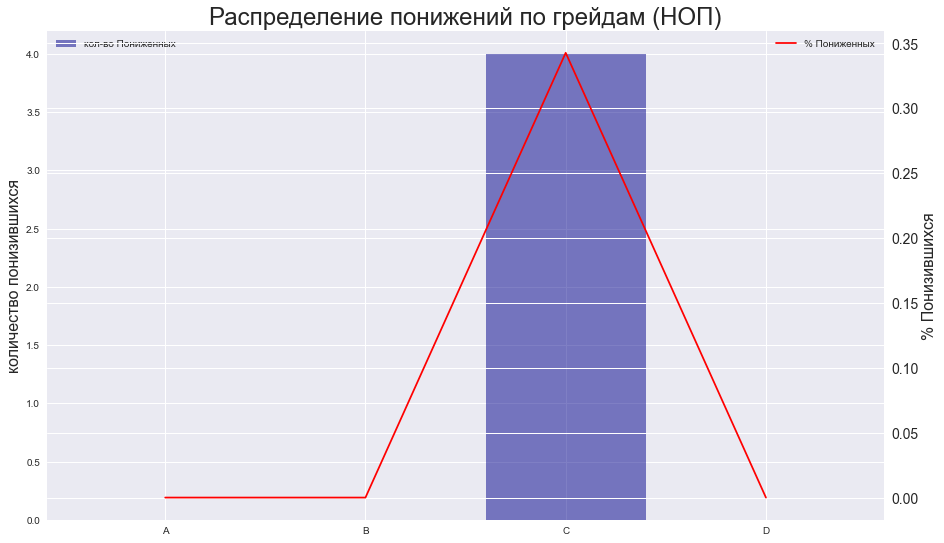

In [213]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(df_gr_down_group['greids'],
       df_gr_down_group['year_down'],
       color='darkblue', alpha =0.5, label = 'кол-во Пониженных')
ax2=ax.twinx()
ax2.plot(df_gr_down_group['greids'],
       df_gr_down_group['%downs'],
       color='red', label = '% Пониженных')

# Подписи графика:
plt.title('Распределение понижений по грейдам (НОП)', fontsize=24)
plt.xlabel('Грейд', fontsize=16)
ax.set_ylabel('количество понизившихся', fontsize=16)
ax2.set_ylabel('% Понизившихся', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


#plt.legend()
plt.savefig('graphs/Распределение понижений по грейдам (НОП).png', bbox_inches = 'tight')
plt.show()

# Выводы:

Несмотря на тенденцию на рост % увольнений относительно грейда. Совокупность таких факторов как:

Разница в % между соседними грейдами не превышающая 1-го%.
Кол-во не превышающее 5 человек.
Максимальная доля уволенных внутри грейда – 1.2%
Снижение % текучки относительно аналогичного периода за предыдущий год

Все это говорит о том, что есть тенденция на рост % увольнений относительно грейда. Но данная тенденция незначительна, так как % увольнений низкий. При этом вне зависимости от полученного грейда 98% аттестованных сотрудников внутри грейда продолжают работать. 
